Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image

Directory Paths for Image PreProcessing

In [2]:
Train_Dir = r'C:\Users\Milanjeet Singh\Desktop\Final\Train'
Val_Dir = r'C:\Users\Milanjeet Singh\Desktop\Final\Validation'

Training and Validation Generator

In [3]:
Train_Gen = ImageDataGenerator(rescale=1/255.)
Val_Gen = ImageDataGenerator(rescale = 1/255.)

Creating training and Validation data

In [4]:
Train = Train_Gen.flow_from_directory(Train_Dir,
                                      target_size=(256,256),
                                       batch_size=50,
                                       class_mode='binary')

Found 10000 images belonging to 2 classes.


In [5]:
Validation = Val_Gen.flow_from_directory(Val_Dir,
                                         target_size=(256,256),
                                         batch_size = 40,
                                         class_mode = 'binary')

Found 800 images belonging to 2 classes.


Creating a Sequential Model

In [6]:
Model = Sequential()

Adding Layers to the Sequential Model

First Input Layer
and Maxpooling layer

In [8]:
Model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
Model.add(layers.MaxPool2D(2,padding='same'))

Adding second layer and a Max Pooling Layer

In [9]:
Model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
Model.add(layers.MaxPool2D(2,padding='same'))

Third CNN Layer and Max Pooling Layer

In [10]:
Model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
Model.add(layers.MaxPool2D(2,padding='same'))

Fourth CNN Layer and Max Pooling Layer

In [11]:
Model.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
Model.add(layers.MaxPool2D(2,padding='same'))

Falttening the Final CNN Layer

In [12]:
Model.add(layers.Flatten())

Adding a Hidden Layer of 300 Neurons with ReLu Activation

In [13]:
Model.add(layers.Dense(300,activation='relu'))

Another Dense Hidden Layer of 100 Neurons with ReLu Activation


In [14]:
Model.add(layers.Dense(100,activation='relu'))

Final Output Layer with 1 neurons and Sigmoid Activation

In [15]:
Model.add(layers.Dense(1,activation='sigmoid'))

In [16]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       1

Compiling the Model for max Accuracy

In [17]:
Model.compile(optimizer = optimizers.RMSprop(learning_rate= 2e-5) , loss='binary_crossentropy',metrics='accuracy')

Training the Model

In [19]:
Model.fit_generator(Train ,steps_per_epoch=200 ,epochs=10 ,validation_data=Validation,validation_steps=20)

Epoch 1/10
200/200 [==============================] - 53s 262ms/step - loss: 0.0407 - accuracy: 0.9844 - val_loss: 0.0255 - val_accuracy: 0.9950
Epoch 2/10
200/200 [==============================] - 52s 260ms/step - loss: 0.0348 - accuracy: 0.9875 - val_loss: 0.0232 - val_accuracy: 0.9937
Epoch 3/10
200/200 [==============================] - 54s 272ms/step - loss: 0.0306 - accuracy: 0.9892 - val_loss: 0.0317 - val_accuracy: 0.9900
Epoch 4/10
200/200 [==============================] - 53s 263ms/step - loss: 0.0288 - accuracy: 0.9892 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 5/10
200/200 [==============================] - 52s 261ms/step - loss: 0.0257 - accuracy: 0.9907 - val_loss: 0.0164 - val_accuracy: 0.9962
Epoch 6/10
200/200 [==============================] - 55s 273ms/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0164 - val_accuracy: 0.9962
Epoch 7/10
200/200 [==============================] - 55s 274ms/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0139 - val_ac

In [20]:
Df = pd.DataFrame(Model.history.history)

<AxesSubplot:>

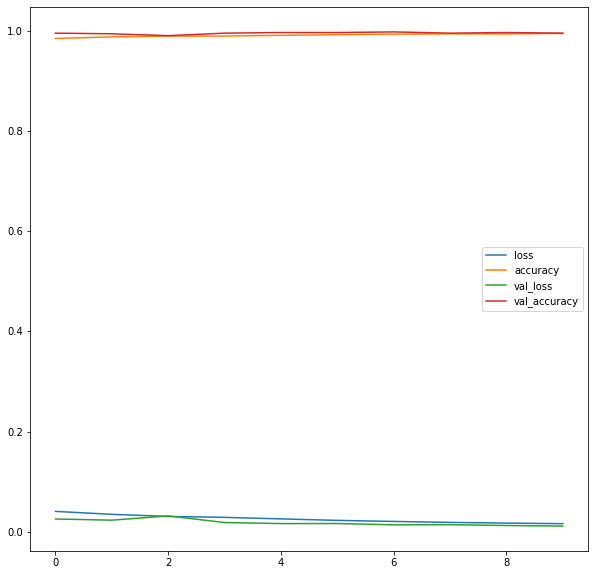

In [21]:
Df.plot(figsize=(10,10))

In [22]:
import cv2

In [23]:
Cascade = r'C:\Users\Milanjeet Singh\Desktop\Haar Cascades\haarcascade_frontalface_default.xml'

In [24]:
Face = cv2.CascadeClassifier(Cascade)

In [25]:
Video = cv2.VideoCapture(0)

Capturing Feed

In [26]:
while Video.isOpened():
    _,img = Video.read()
    Face_img = Face.detectMultiScale(img,scaleFactor = 1.1,minNeighbors = 4)
    for(x,y,w,h) in Face_img:
        Face_img = img[y:y+h,x:x+w]
        cv2.imwrite('temp.jpg',Face_img)
        Test_img = image.load_img('temp.jpg',target_size=(256,256,3))
        Test_img = image.img_to_array(Test_img)
        Test_img = np.expand_dims(Test_img,axis=0)
        Pred = Model.predict_classes(Test_img)[0][0]
        if Pred == 1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'NO MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'MASK',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
    cv2.imshow('img',img)
    if cv2.waitKey(1)==ord('q'):
        break

c:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


: 

In [50]:
Video.release()

In [51]:
cv2.destroyAllWindows()